| Data name| In master function |  All years dataframe
| -------- | -------- |  -------- | 
|Schüler/-innen je Lehrkraft | teachers_yyyy| teachers_concat
|Anzahl an Lehrkräften | students_per_teacher_yyyy| students_per_teacher_concat
|Anzahl an Schülern | students_yyyy| students_concat
|Unterichtsstd. Je Schüler	| hours_per_student_yyyy|hours_per_student_concat
|Ausgaben 	| ausgaben_yyyy|ausgaben_concat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

from master import ausgaben_concat

/Users/kamilkarim/neuefische/capstone_project_hh_23_1/master.py:202: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ausgaben.iloc[:, 1:15] = ausgaben.iloc[:, 1:15].astype('Int64')
/Users/kamilkarim/neuefische/capstone_project_hh_23_1/master.py:202: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ausgaben.iloc[:, 1:15] = ausgaben.iloc[:, 1:15].astype('Int64')
/Users/kamilkarim/neuefische/capstone_project_hh_23_1/master.py:202: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a 

In [2]:
ausgaben_concat.head()

,Federal States,Allg bildende Schulen,Berufliche Schulen Insgesamt,darunter: im Dualen System,Alle Schularten,Grund schulen,Hauptschulen,Schulen mit mehreren Bildungsgängen,Realschulen,Gymnasien,Integrierte Gesamt schulen,Personalausgaben,Laufender Sach-aufwand,Investi-tionsaus-gaben,Gesamtausgaben,darunter: von staatlicher Ebene,year
0,Baden-Württemberg,6300,4700,2600,5900,5100,6500,0,5300,6700,0,4600,700,600,5900,4300,2010-01-01
1,Bayern,6900,3800,2700,6200,5700,8000,0,6300,7500,0,4500,700,900,6200,4000,2010-01-01
2,Berlin,7600,4400,2800,6900,6000,0,0,7400,7400,8600,5600,1000,300,6900,6900,2010-01-01
3,Brandenburg,6700,3600,3000,6000,4800,0,8200,0,6800,8000,4700,700,700,6000,4400,2010-01-01
4,Bremen,7000,3600,2400,6000,5900,0,6900,0,6400,7200,4500,1200,300,6000,6000,2010-01-01


#### States with the highest investment per student

In [3]:
# Group by State and Year, calculate mean fail Rate
state_year_invest = ausgaben_concat.groupby(['Federal States', 'year'])['Berufliche Schulen Insgesamt'].mean().reset_index()

# Sort by fail Rate in descending order
state_year_invest_sorted = state_year_invest.sort_values(by='Berufliche Schulen Insgesamt', ascending=False)

# Get state with highest fail Rate per year
state_with_highest_invest = state_year_invest_sorted.groupby('year').first()

state_with_highest_invest

,Federal States,Berufliche Schulen Insgesamt
year,,
2010-01-01,Thüringen,5300.0
2011-01-01,Thüringen,5700.0
2012-01-01,Thüringen,6200.0
2013-01-01,Thüringen,6500.0
2014-01-01,Thüringen,6700.0
2015-01-01,Thüringen,6700.0
2016-01-01,Thüringen,6900.0
2017-01-01,Thüringen,6900.0
2019-01-01,Berlin,7700.0


In [4]:
# Group by year and sum the columns
df_sum = ausgaben_concat.groupby('Federal States')['Berufliche Schulen Insgesamt'].mean().reset_index()

In [5]:
df_sum

,Federal States,Berufliche Schulen Insgesamt
0,Baden-Württemberg,5355.555556
1,Bayern,4788.888889
2,Berlin,5622.222222
3,Brandenburg,4511.111111
4,Bremen,4088.888889
5,Hamburg,5333.333333
6,Hessen,4955.555556
7,Mecklenburg-Vorpommern,3744.444444
8,Niedersachsen,4266.666667
9,Nordrhein-Westfalen,4022.222222


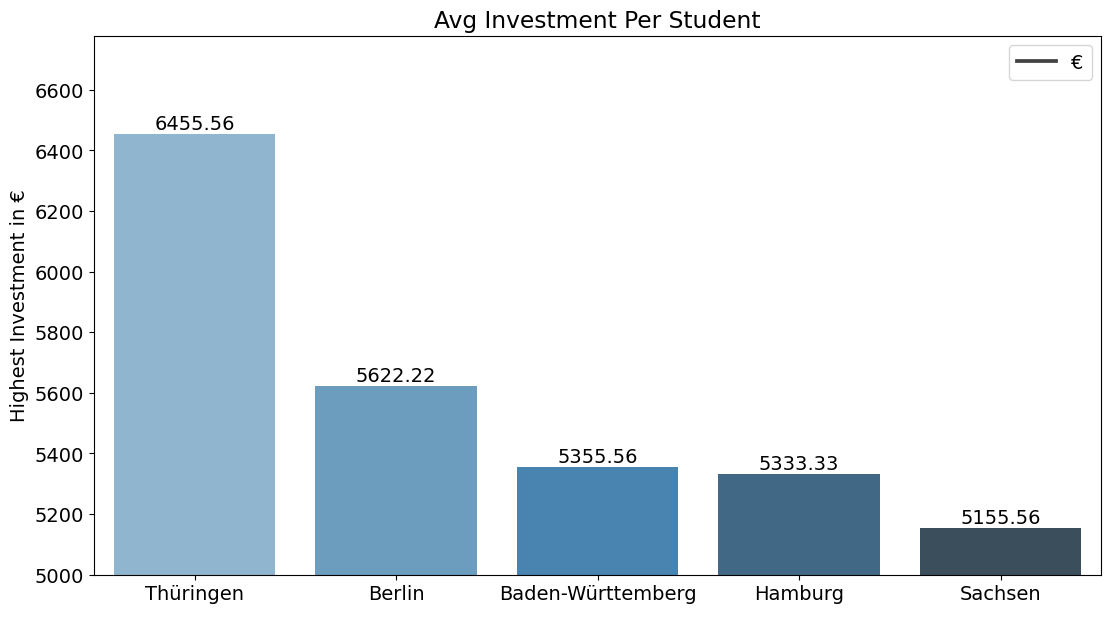

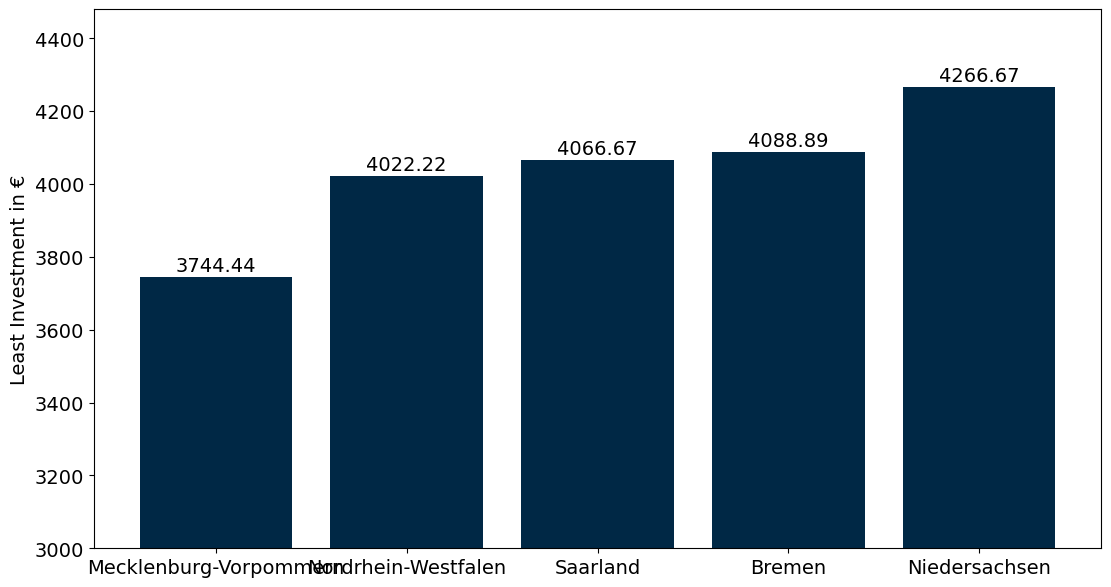

In [37]:
# Calculate the average passing rate for each state
avg_berufliche_schulen = ausgaben_concat.groupby('Federal States')['Berufliche Schulen Insgesamt'].mean().reset_index()
avg_berufliche_schulen1 = ausgaben_concat.groupby('Federal States')['Berufliche Schulen Insgesamt'].mean().reset_index()

# Sort the states based on average Pass Rate
top_states_highest = avg_berufliche_schulen.sort_values('Berufliche Schulen Insgesamt', ascending=False).head(5)
top_states_lowest = avg_berufliche_schulen1.sort_values('Berufliche Schulen Insgesamt', ascending=True).head(5)

plt.figure(figsize=(13, 7))
#plt.rcParams.update({'font.size': 14})
# Create a bar chart for top 3 states with highest Pass Rate
sns.barplot(x=top_states_highest['Federal States'], y=top_states_highest['Berufliche Schulen Insgesamt'], palette="Blues_d")#, color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
plt.xlabel(' ')
plt.ylabel('Highest Investment in €')
plt.title('Avg Investment Per Student')
plt.legend(['€'])
plt.ylim(bottom=5000)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_highest['Berufliche Schulen Insgesamt']):
    plt.text(i, v + 15, str(round(v, 2)), ha='center', color='black')

plt.show()



plt.figure(figsize=(13, 7))
# Create a bar chart for top 3 states with lowest Pass Rate
plt.bar(top_states_lowest['Federal States'], top_states_lowest['Berufliche Schulen Insgesamt'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Least Investment in €')
#plt.title('Top 5 States with Highest Failing Rate in the Last Decade')
plt.ylim(bottom=3000)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_lowest['Berufliche Schulen Insgesamt']):
    plt.text(i, v + 15, str(round(v, 2)), ha='center', color='black')

plt.show()


In [ ]:
# Group by year and sum the columns
df_sum = exams_concat.groupby('year').sum()

# Calculate overall Pass rate
df_sum['Pass Rate'] = (df_sum['Passed Examinations'] / df_sum['Examinations Total']) * 100

# Extract year and Pass rate columns
df_Pass_rate = df_sum[['Pass Rate']]

# Convert year column to datetime
df_Pass_rate.index = pd.to_datetime(df_Pass_rate.index)

# Plot the Pass rate over the years
df_Pass_rate.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Pass rate over the years')
plt.xlabel('Year')
plt.ylabel('Pass Rate (%)')
plt.grid(True)
plt.show()